## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  39.368755   956.861685  0.157846   7.935388  1.214014
1  94.307548  1424.324173  0.563569   4.486678  1.580024
2  80.797918  1004.326378  0.883258  10.004954  1.559059
3  20.104582   865.435132  0.803197   2.194150  1.478358
4  58.766559   416.234877  0.000185   3.075373  0.083355


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8569325	total: 57.2ms	remaining: 57.1s
1:	learn: 0.8490941	total: 57.7ms	remaining: 28.8s
2:	learn: 0.8399649	total: 58.1ms	remaining: 19.3s
3:	learn: 0.8333348	total: 58.5ms	remaining: 14.6s
4:	learn: 0.8228098	total: 58.9ms	remaining: 11.7s
5:	learn: 0.8134715	total: 59.3ms	remaining: 9.83s
6:	learn: 0.8070113	total: 59.8ms	remaining: 8.48s
7:	learn: 0.8003242	total: 60.2ms	remaining: 7.46s
8:	learn: 0.7932219	total: 60.7ms	remaining: 6.68s
9:	learn: 0.7851581	total: 61.1ms	remaining: 6.05s
10:	learn: 0.7771300	total: 61.6ms	remaining: 5.54s
11:	learn: 0.7688728	total: 62.1ms	remaining: 5.11s
12:	learn: 0.7620266	total: 62.5ms	remaining: 4.75s
13:	learn: 0.7543878	total: 63.1ms	remaining: 4.44s
14:	learn: 0.7461616	total: 63.5ms	remaining: 4.17s
15:	learn: 0.7389025	total: 64ms	remaining: 3.93s
16:	learn: 0.7329267	total: 64.7ms	remaining: 3.74s
17:	learn: 0.7263254	total: 65.1ms	remaining: 3.55s
18:	learn: 0.7188552	total: 65.5ms	remaining: 

117:	learn: 0.3385499	total: 108ms	remaining: 809ms
118:	learn: 0.3361701	total: 109ms	remaining: 805ms
119:	learn: 0.3343661	total: 109ms	remaining: 801ms
120:	learn: 0.3324076	total: 110ms	remaining: 796ms
121:	learn: 0.3300945	total: 110ms	remaining: 793ms
122:	learn: 0.3284953	total: 111ms	remaining: 788ms
123:	learn: 0.3262937	total: 111ms	remaining: 784ms
124:	learn: 0.3245846	total: 111ms	remaining: 779ms
125:	learn: 0.3224170	total: 112ms	remaining: 775ms
126:	learn: 0.3202348	total: 112ms	remaining: 771ms
127:	learn: 0.3184899	total: 113ms	remaining: 768ms
128:	learn: 0.3167541	total: 113ms	remaining: 764ms
129:	learn: 0.3149419	total: 114ms	remaining: 761ms
130:	learn: 0.3132542	total: 114ms	remaining: 757ms
131:	learn: 0.3119013	total: 114ms	remaining: 753ms
132:	learn: 0.3100165	total: 115ms	remaining: 749ms
133:	learn: 0.3084541	total: 115ms	remaining: 744ms
134:	learn: 0.3065500	total: 116ms	remaining: 741ms
135:	learn: 0.3048017	total: 116ms	remaining: 737ms
136:	learn: 

292:	learn: 0.1564643	total: 185ms	remaining: 447ms
293:	learn: 0.1560615	total: 186ms	remaining: 446ms
294:	learn: 0.1555786	total: 186ms	remaining: 445ms
295:	learn: 0.1552853	total: 186ms	remaining: 443ms
296:	learn: 0.1548255	total: 187ms	remaining: 442ms
297:	learn: 0.1544271	total: 187ms	remaining: 441ms
298:	learn: 0.1537486	total: 188ms	remaining: 440ms
299:	learn: 0.1533667	total: 188ms	remaining: 439ms
300:	learn: 0.1530615	total: 189ms	remaining: 438ms
301:	learn: 0.1524611	total: 189ms	remaining: 437ms
302:	learn: 0.1520776	total: 189ms	remaining: 436ms
303:	learn: 0.1515496	total: 190ms	remaining: 434ms
304:	learn: 0.1508401	total: 190ms	remaining: 433ms
305:	learn: 0.1506194	total: 191ms	remaining: 432ms
306:	learn: 0.1503973	total: 191ms	remaining: 431ms
307:	learn: 0.1499712	total: 191ms	remaining: 430ms
308:	learn: 0.1496559	total: 192ms	remaining: 429ms
309:	learn: 0.1490641	total: 192ms	remaining: 428ms
310:	learn: 0.1487964	total: 192ms	remaining: 426ms
311:	learn: 

532:	learn: 0.0900677	total: 290ms	remaining: 254ms
533:	learn: 0.0899267	total: 290ms	remaining: 253ms
534:	learn: 0.0895690	total: 291ms	remaining: 253ms
535:	learn: 0.0894304	total: 291ms	remaining: 252ms
536:	learn: 0.0891855	total: 292ms	remaining: 251ms
537:	learn: 0.0888383	total: 292ms	remaining: 251ms
538:	learn: 0.0885998	total: 292ms	remaining: 250ms
539:	learn: 0.0884666	total: 293ms	remaining: 249ms
540:	learn: 0.0881349	total: 293ms	remaining: 249ms
541:	learn: 0.0880038	total: 293ms	remaining: 248ms
542:	learn: 0.0876788	total: 294ms	remaining: 247ms
543:	learn: 0.0875307	total: 294ms	remaining: 247ms
544:	learn: 0.0871914	total: 295ms	remaining: 246ms
545:	learn: 0.0868913	total: 295ms	remaining: 245ms
546:	learn: 0.0867822	total: 295ms	remaining: 245ms
547:	learn: 0.0866113	total: 296ms	remaining: 244ms
548:	learn: 0.0863768	total: 296ms	remaining: 243ms
549:	learn: 0.0862032	total: 297ms	remaining: 243ms
550:	learn: 0.0860937	total: 297ms	remaining: 242ms
551:	learn: 

706:	learn: 0.0559649	total: 367ms	remaining: 152ms
707:	learn: 0.0557693	total: 368ms	remaining: 152ms
708:	learn: 0.0555316	total: 368ms	remaining: 151ms
709:	learn: 0.0553612	total: 369ms	remaining: 151ms
710:	learn: 0.0551956	total: 369ms	remaining: 150ms
711:	learn: 0.0550345	total: 369ms	remaining: 149ms
712:	learn: 0.0549524	total: 370ms	remaining: 149ms
713:	learn: 0.0548694	total: 370ms	remaining: 148ms
714:	learn: 0.0546649	total: 370ms	remaining: 148ms
715:	learn: 0.0544646	total: 371ms	remaining: 147ms
716:	learn: 0.0542622	total: 371ms	remaining: 147ms
717:	learn: 0.0541922	total: 372ms	remaining: 146ms
718:	learn: 0.0539229	total: 372ms	remaining: 145ms
719:	learn: 0.0537246	total: 373ms	remaining: 145ms
720:	learn: 0.0535303	total: 373ms	remaining: 144ms
721:	learn: 0.0532814	total: 373ms	remaining: 144ms
722:	learn: 0.0531557	total: 374ms	remaining: 143ms
723:	learn: 0.0530324	total: 375ms	remaining: 143ms
724:	learn: 0.0527901	total: 375ms	remaining: 142ms
725:	learn: 

943:	learn: 0.0344773	total: 471ms	remaining: 28ms
944:	learn: 0.0344150	total: 472ms	remaining: 27.5ms
945:	learn: 0.0344005	total: 472ms	remaining: 27ms
946:	learn: 0.0343033	total: 473ms	remaining: 26.5ms
947:	learn: 0.0342647	total: 473ms	remaining: 26ms
948:	learn: 0.0341961	total: 474ms	remaining: 25.5ms
949:	learn: 0.0341804	total: 475ms	remaining: 25ms
950:	learn: 0.0341195	total: 475ms	remaining: 24.5ms
951:	learn: 0.0340771	total: 476ms	remaining: 24ms
952:	learn: 0.0340357	total: 476ms	remaining: 23.5ms
953:	learn: 0.0340214	total: 476ms	remaining: 23ms
954:	learn: 0.0339262	total: 477ms	remaining: 22.5ms
955:	learn: 0.0338589	total: 477ms	remaining: 22ms
956:	learn: 0.0338329	total: 478ms	remaining: 21.5ms
957:	learn: 0.0337910	total: 479ms	remaining: 21ms
958:	learn: 0.0337658	total: 479ms	remaining: 20.5ms
959:	learn: 0.0337345	total: 479ms	remaining: 20ms
960:	learn: 0.0336749	total: 480ms	remaining: 19.5ms
961:	learn: 0.0336505	total: 480ms	remaining: 19ms
962:	learn: 0

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

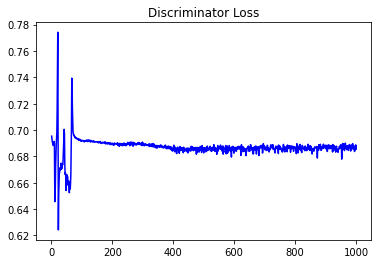

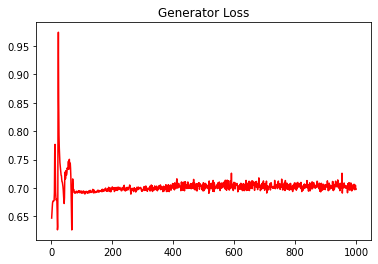

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4825587979267123


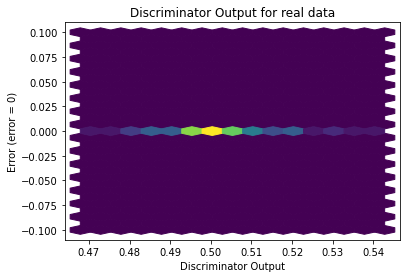

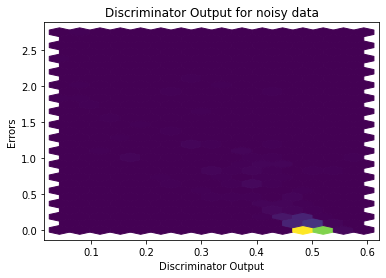

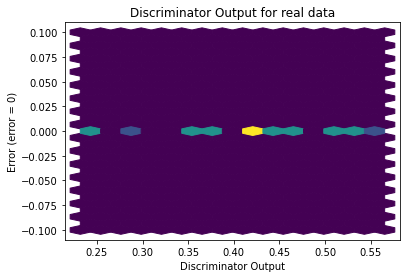

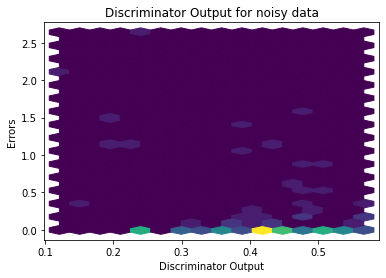

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


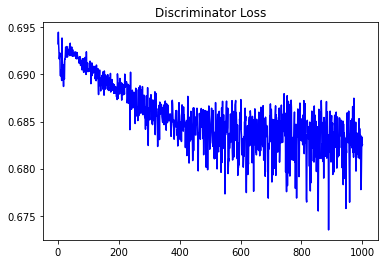

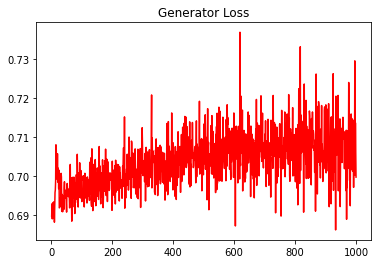

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4294225310160403


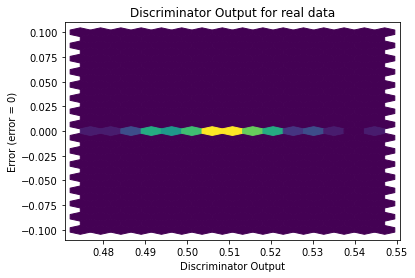

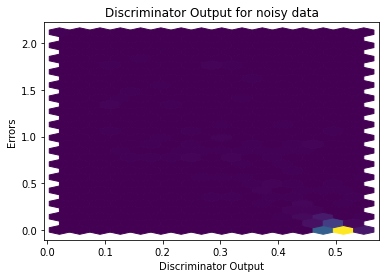

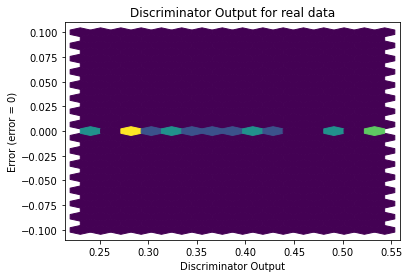

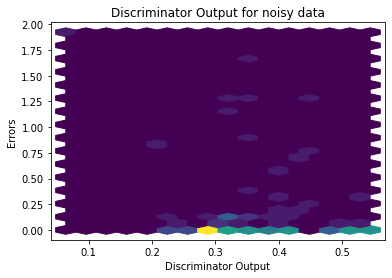

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5953]], requires_grad=True)
